In [2]:
import numpy as np
import matplotlib.pyplot as plt

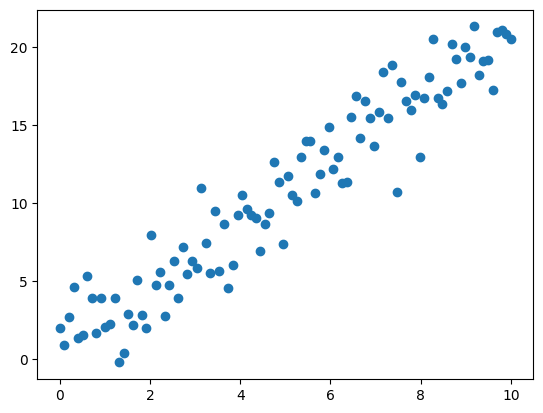

In [3]:
np.random.seed(42)
n = 100
x = np.linspace(0, 10, n)
epsilon = np.random.normal(0, 2, n)
y = 2 * x + 1 + epsilon
trainExample = list(zip(x, y))
plt.scatter(x,y)

In [4]:
# φ(x) = [x, 1]^T
def phi(x):
    return np.array([x, 1.0])

In [15]:
# Loss function L(w)
def compute_loss(w, x_data, y_data):
    return np.mean([(np.dot(w, phi(xi)) - yi) ** 2 for xi, yi in zip(x_data, y_data)])

In [16]:
# Gradient of loss function L(w)
def compute_gradient(w, x_data, y_data):
    grad = np.zeros(2)
    for xi, yi in zip(x_data, y_data):
        grad += 2 * (np.dot(w, phi(xi)) - yi) * phi(xi)
    return grad / len(x_data)

In [17]:
# GD of loss function L(w)
def gradient_descent(x, y, eta=0.01, max_iter=2000, loss_threshold=0.05):
    w = np.array([0.0, 0.0])
    losses = []
    for i in range(max_iter):
        loss = compute_loss(w, x, y)
        losses.append(loss)
        if loss < loss_threshold:
            return w, losses, i + 1  # trả về w, danh sách loss và số vòng lặp
        w -= eta * compute_gradient(w, x, y)
    return w, losses, max_iter

In [20]:
# So sánh η (0.001, 0.01, 0.1)
def test_and_plot_learning_rates():
    np.random.seed(42)
    n = 100
    x = np.linspace(0, 10, n)
    epsilon = np.random.normal(0, 2, n)
    y = 2 * x + 1 + epsilon

    etas = [0.001, 0.01, 0.1]
    plt.figure(figsize=(10, 5))

    for eta in etas:
        w, losses, iters = gradient_descent(x, y, eta)
        plt.plot(losses, label=f"η = {eta} ({iters} iterations)")
        print(f"η = {eta:.3f}: Final w = {w}, Final loss = {losses[-1]:.4f}, Converged in {iters} iterations")

    plt.title("Loss vs Iterations for different η")
    plt.xlabel("Iteration")
    plt.ylabel("Loss L(w)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [21]:
# Không nhiễu
def test_and_plot_no_noise():
    n = 100
    x = np.linspace(0, 10, n)
    y = 2 * x + 1  # Không có nhiễu

    w, losses, iters = gradient_descent(x, y, eta=0.01)
    print(f"(No noise) Final w = {w}, Expected w = [2, 1], Loss = {losses[-1]:.6f}, Iterations = {iters}")

    # Vẽ loss
    plt.figure(figsize=(6, 4))
    plt.plot(losses, label="No Noise")
    plt.title("Loss vs Iterations (No Noise)")
    plt.xlabel("Iteration")
    plt.ylabel("Loss L(w)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

η = 0.001: Final w = [2.04662383 0.52776302], Final loss = 3.2637, Converged in 2000 iterations
η = 0.010: Final w = [2.02758898 0.65435802], Final loss = 3.2596, Converged in 2000 iterations


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-15-0a28fd5d6128>:3: RuntimeWarning: overflow encountered in scalar power
  return np.mean([(np.dot(w, phi(xi)) - yi) ** 2 for xi, yi in zip(x_data, y_data)])
<ipython-input-16-c74706149b86>:5: RuntimeWarning: overflow encountered in add
  grad += 2 * (np.dot(w, phi(xi)) - yi) * phi(xi)


η = 0.100: Final w = [nan nan], Final loss = nan, Converged in 2000 iterations


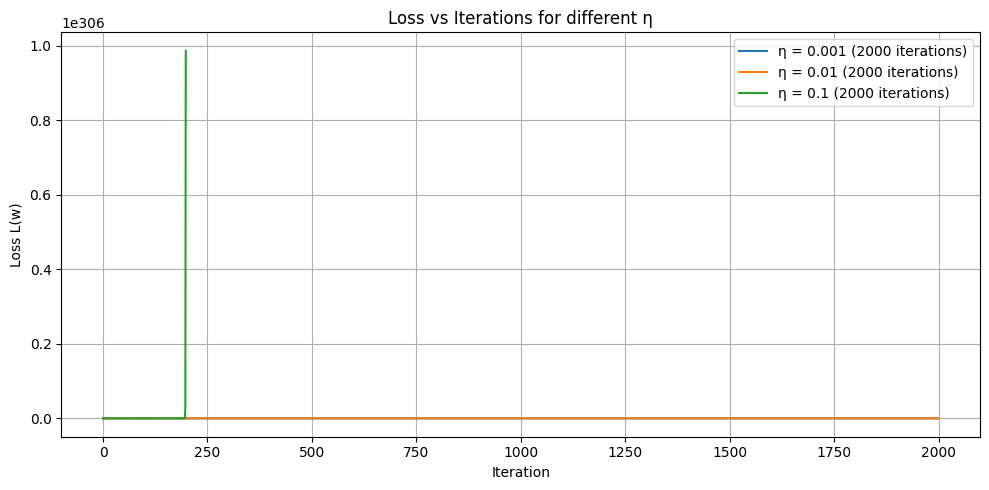

In [22]:
test_and_plot_learning_rates()

(No noise) Final w = [2.06668839 0.55647576], Expected w = [2, 1], Loss = 0.049928, Iterations = 88


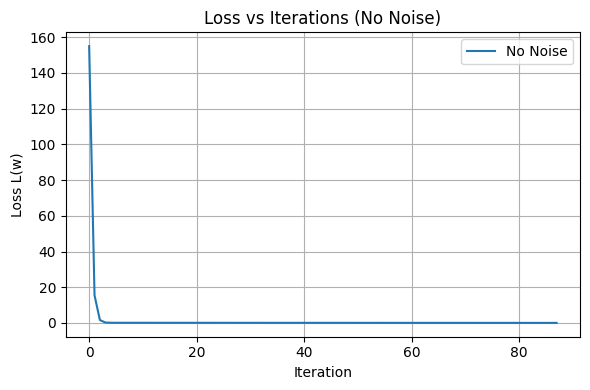

In [23]:
test_and_plot_no_noise()